# Pixel Coordinate Prediction using Deep Learning

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

In [2]:
# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Data generation
def generate_data(num_samples=10000, img_size=50):
    """Generate dataset of images with one pixel set to 255 and all others set to 0.

    Args:
        num_samples (int): Number of samples to generate.
        img_size (int): Size of the square image.

    Returns:
        tuple: Tuple of images and their corresponding coordinates.
    """
    images = np.zeros((num_samples, img_size, img_size, 1))
    coordinates = np.zeros((num_samples, 2))
    
    for i in range(num_samples):
        x, y = np.random.randint(0, img_size, size=2)
        images[i, x, y, 0] = 255
        coordinates[i] = [x, y]
    
    return images, coordinates

# Generate dataset
images, coordinates = generate_data()

In [4]:
# Split into training and validation sets
split_idx = int(0.8 * len(images))
train_images, val_images = images[:split_idx], images[split_idx:]
train_coordinates, val_coordinates = coordinates[:split_idx], coordinates[split_idx:]

In [5]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2)  # Output layer with 2 neurons for x and y coordinates
])

# Compile the model
model.compile(optimizer=Adam(), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Train the model
history = model.fit(train_images, train_coordinates, epochs=20, validation_data=(val_images, val_coordinates))

C:\Users\BASHA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 212ms/step - loss: 110.3328 - root_mean_squared_error: 9.7355 - val_loss: 5.4679 - val_root_mean_squared_error: 2.3384
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 52s 208ms/step - loss: 3.3406 - root_mean_squared_error: 1.8225 - val_loss: 2.4116 - val_root_mean_squared_error: 1.5529
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 207ms/step - loss: 1.4201 - root_mean_squared_error: 1.1911 - val_loss: 1.7929 - val_root_mean_squared_error: 1.3390
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 52s 207ms/step - loss: 1.2684 - root_mean_squared_error: 1.1234 - val_loss: 2.0138 - val_root_mean_squared_error: 1.4191
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 52s 206ms/step - loss: 1.4205 - root_mean_squared_error: 1.1901 - val_loss: 2.1441 - val_root_mean_squared_error: 1.4643
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 212ms/step - loss: 1.1320 - root_mean_squared_error: 1.0628 - val_loss: 1.2528 - val_root_mean_squared_error: 1.1193
Epoch 7/20
250/250 ━━━━━━━━━━━━━

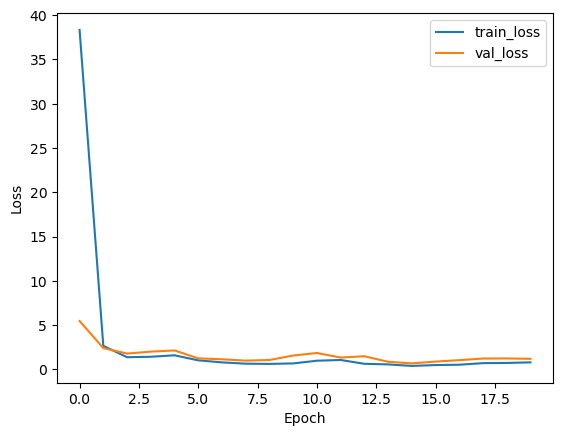

In [6]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


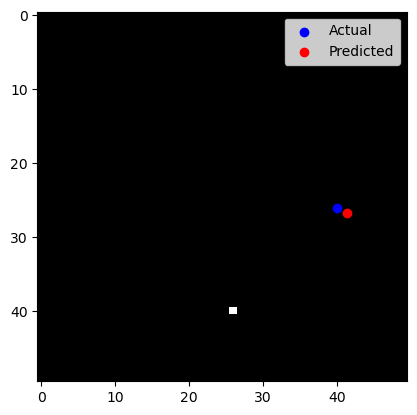

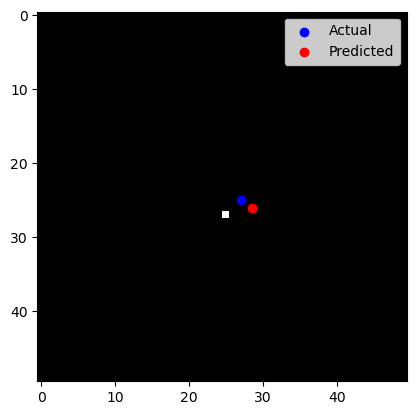

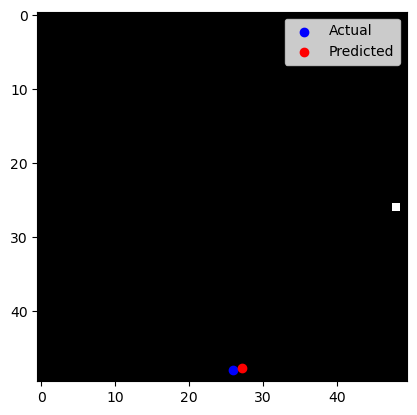

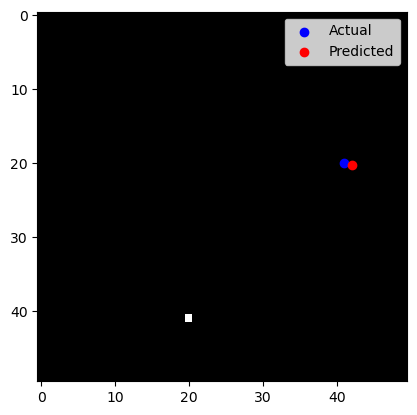

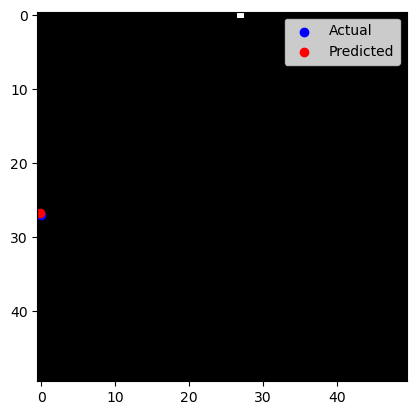

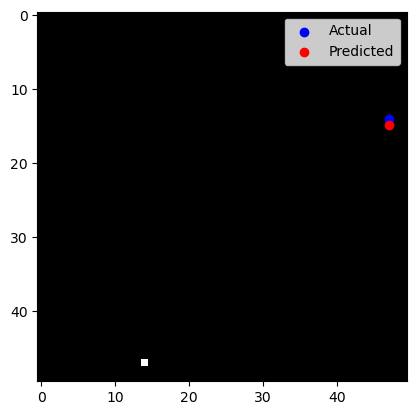

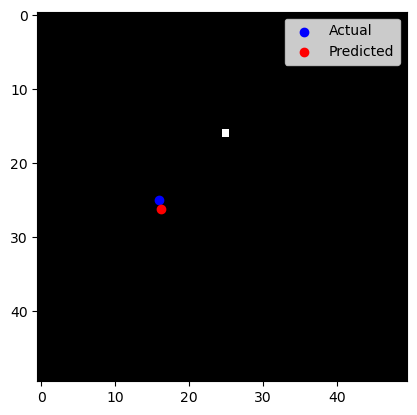

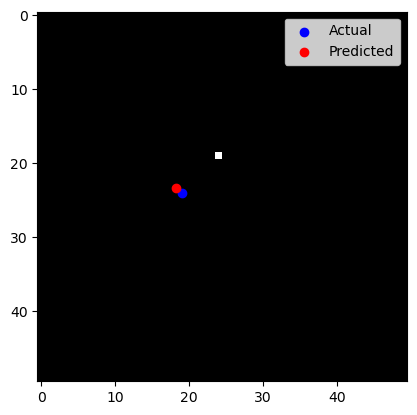

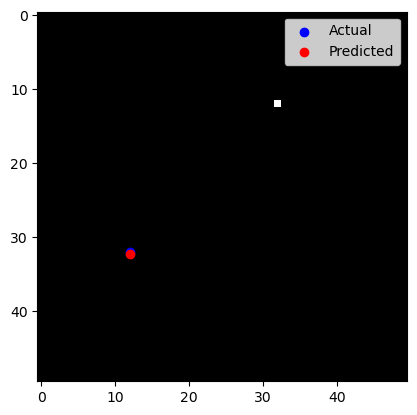

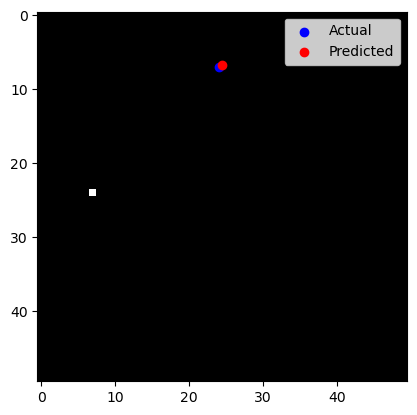

In [8]:
# Plot some examples of predicted vs actual coordinates
preds = model.predict(val_images[:10])
for i in range(10):
    img = val_images[i].reshape(50, 50)
    plt.imshow(img, cmap='gray')
    plt.scatter(*val_coordinates[i], color='blue', label='Actual')
    plt.scatter(*preds[i], color='red', label='Predicted')
    plt.legend()
    plt.show()